# WBS Project 2 - Eniac - Analysis

Mathis Lammert

mathislammert@gmail.com

Created: 2024-03-11

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import matplotlib.dates as mdates
import numpy as np
import addcopyfighandler
from collections import Counter
import os
import seaborn as sns
from scipy.stats import pearsonr

In [17]:
print(os.getcwd())

d:\Nextcloud\Coding\WBS Coding School\4. Project 2


In [36]:
### load data
folder = ".\data\\"

brands = pd.DataFrame(pd.read_csv(folder+"brands_clean.csv"))
items = pd.DataFrame(pd.read_csv(folder+"items_clean.csv"))
orders = pd.DataFrame(pd.read_csv(folder+"orders_clean.csv"))
products = pd.DataFrame(pd.read_csv(folder+"products_clean.csv"))
orders_agg = pd.DataFrame(pd.read_csv(folder+"orders_agg_clean.csv"))

In [ ]:
# load data online

# def gd_path(file_id):
#     """Generate a shareable link from Google Drive file id."""
#     return f"https://drive.google.com/uc?export=download&id={file_id}"

# # Google Drive file ids
# files_id = {
#     "brands": "1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD",
#     "items": "1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG",
#     "orders": "1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ",
#     "products": "1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU"
# }

# # Read data from Google Drive
# orders = pd.DataFrame(pd.read_csv(gd_path(files_id["orders"])))
# items = pd.DataFrame(pd.read_csv(gd_path(files_id["items"])))
# products = pd.DataFrame(pd.read_csv(gd_path(files_id["products"])))
# brands = pd.DataFrame(pd.read_csv(gd_path(files_id["brands"])))

In [38]:
#  data types "date"
orders["date"] = pd.to_datetime(orders["date"])   # as date
items["date"] = pd.to_datetime(items["date"]) # as date
orders_agg["date"] = pd.to_datetime(orders_agg["date"]) # as date


### Orders (=Sales)

C:\Users\nix-n\AppData\Local\Temp\ipykernel_18128\1073502723.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.date.describe()


<Axes: xlabel='date'>

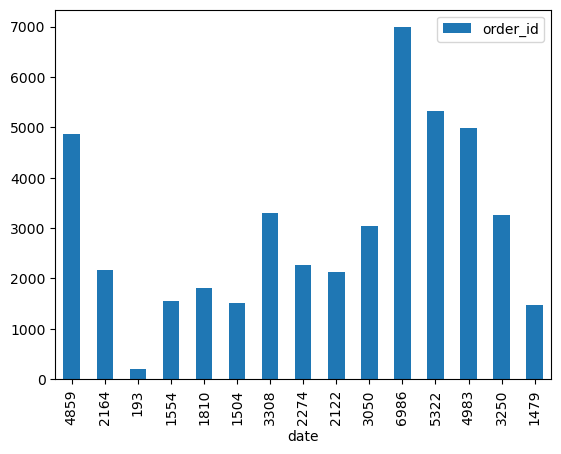

In [71]:
##  Orders per time
orders.date.min() # Start 2017-01-01
orders.date.max() # End   2018-03-14
orders.date.describe()
((orders.date.max() - orders.date.min())/pd.Timedelta(1, 'W'))*4.35
orders.date.max().to_period("M")-orders.date.min().to_period("M")


orders.groupby(orders["date"].dt.to_period("M")).count().plot(kind="bar", x="date", y="order_id")

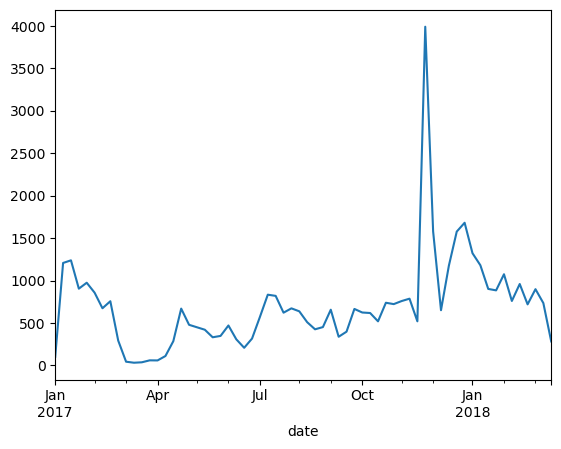

In [72]:
# Number of orders - the whole period - by Week
orders.resample("W", on="date")["order_id"].count().plot();
plt.show()

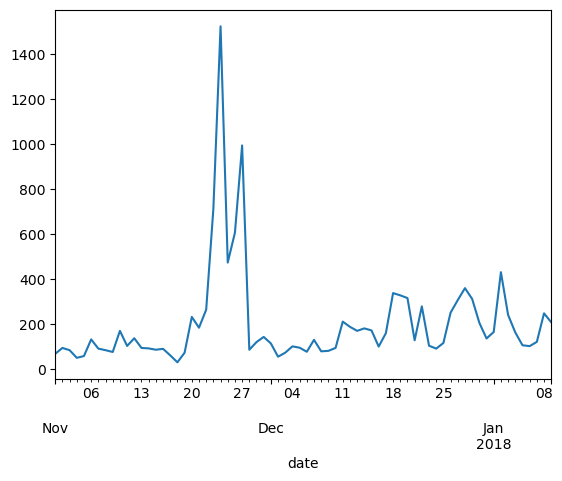

In [73]:
# Number of orders - Nov 2017 (Black Friday Spike) - by Week
(orders.loc[orders.date.between("2017-11-01", "2018-01-10")]
 .resample("D", on="date")
 ["order_id"]
 .count()
 .plot()
);
plt.show()

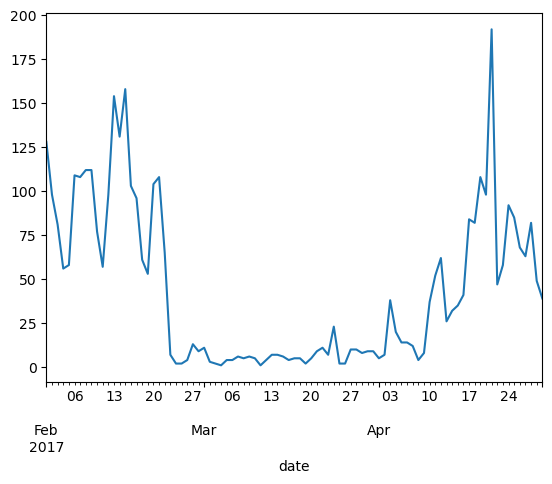

In [74]:
# Number of orders - Feb to May 2017 (weird drop) - by day
orders.loc[orders.date.between("2017-02-01", "2017-05-01")].resample("D", on="date")["order_id"].count().plot();
plt.show()


## Relationship of prices

In [39]:
# mean prices
orders_agg.mean()

C:\Users\nix-n\AppData\Local\Temp\ipykernel_18128\2006417770.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  orders_agg.mean()


order_id                        415491.046212
total_paid                         333.561269
sum_prices_as_shopped              329.496713
sum_prices_as_listed               382.751371
sum_dicount_prices_as_listed       330.046608
qty                                  1.477418
discount_perc                       20.299790
discount                            53.254657
discount_est_perc                   19.510640
discount_est                         0.549894
freight                              4.064555
dtype: float64

In [40]:
# mean prices by date
(orders_agg.resample("W", on="date")
            .agg({"order_id":["count"],
                  "total_paid":["mean","sum"],
                  "sum_prices_as_shopped":["mean","sum"],
                  "sum_prices_as_listed":["mean","sum"],
                  "discount":["mean","sum"],
                  "discount_perc":["mean","sum"],
                  "sum_dicount_prices_as_listed":["mean","sum"],
                  "freight":["mean","sum"]})
            .round(1))

order_id total_paid           sum_prices_as_shopped            \
              count       mean       sum                  mean       sum   
date                                                                       
2017-01-01      100      276.5   27653.9                 272.1   27209.6   
2017-01-08     1207      194.6  234916.8                 191.9  231641.4   
2017-01-15     1238      184.2  228092.4                 180.4  223314.5   
2017-01-22      904      232.8  210469.1                 229.6  207540.4   
2017-01-29      974      293.7  286025.4                 290.3  282755.0   
...             ...        ...       ...                   ...       ...   
2018-02-18      959      262.2  251494.3                 254.2  243743.2   
2018-02-25      719      330.2  237411.5                 323.6  232674.2   
2018-03-04      898      322.9  289961.1                 317.0  284643.8   
2018-03-11      734      334.1  245254.1                 328.0  240785.0   
2018-03-18      282      265.7   74924.6                 259.9   73282.2   

           sum_prices_as_listed           discount          discount_perc  \
                           mean       sum     mean      sum          mean   
date                                                                        
2017-01-01                332.2   33223.3     60.1   6013.7          21.5   
2017-01-08                230.5  278180.5     38.6  46539.2          22.3   
2017-01-15                217.6  269383.2     37.2  46068.8          26.3   
2017-01-22                270.1  244159.0     40.5  36618.6          21.9   
2017-01-29                345.5  336480.2     55.2  53725.2          27.2   
...                         ...       ...      ...      ...           ...   
2018-02-18                314.4  301539.2     60.3  57796.0          29.8   
2018-02-25                371.1  266854.8     47.5  34180.7          18.0   
2018-03-04                370.1  332389.1     53.2  47745.3          19.9   
2018-03-11                383.9  281790.6     55.9  41005.6          20.4   
2018-03-18                304.6   85883.1     44.7  12600.9          23.3   

                    sum_dicount_prices_as_listed           freight          
                sum                         mean       sum    mean     sum  
date                                                                        
2017-01-01   2150.9                        271.6   27160.0     4.4   444.3  
2017-01-08  26873.9                        185.9  224341.7     2.7  3275.5  
2017-01-15  32513.9                        173.5  214832.1     3.9  4777.9  
2017-01-22  19762.6                        223.5  202023.9     3.2  2928.6  
2017-01-29  26537.7                        288.6  281110.2     3.4  3270.3  
...             ...                          ...       ...     ...     ...  
2018-02-18  28571.1                        262.3  251512.7     8.1  7751.1  
2018-02-25  12908.4                        325.8  234225.1     6.6  4737.3  
2018-03-04  17845.7                        316.6  284293.3     5.9  5317.3  
2018-03-11  14990.0                        328.5  241095.6     6.1  4469.1  
2018-03-18   6563.4                        261.0   73596.6     5.8  1642.4  

[64 rows x 15 columns]

Plot: mean prices mean/sum over time

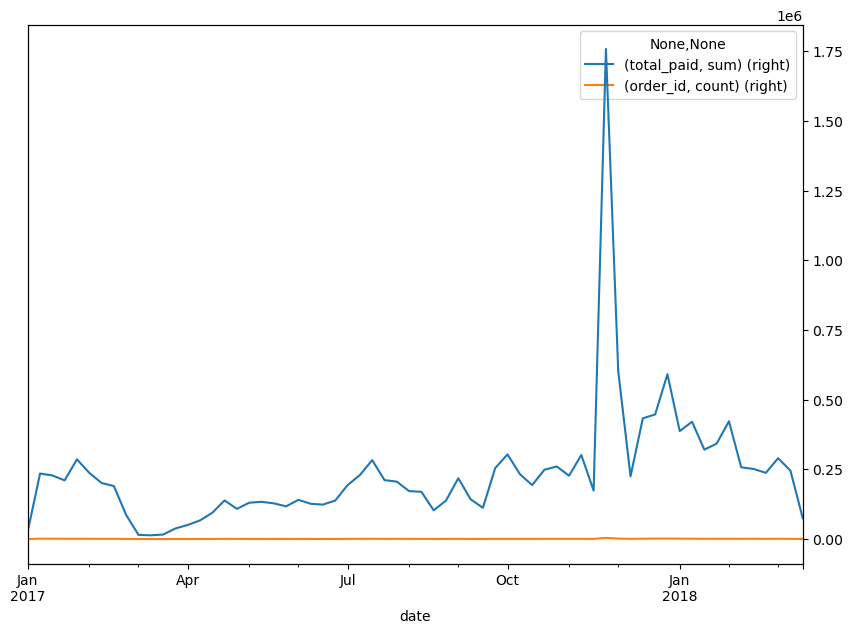

In [41]:
(orders_agg.resample("W", on="date")
            .agg({"order_id":["count"],
                  "total_paid":["mean","sum"],
                  "sum_prices_as_shopped":["mean","sum"],
                  "sum_prices_as_listed":["mean","sum"],
                  "discount":["mean","sum"],
                  "discount_perc":["mean","sum"],
                  "discount_est":["mean","sum"],
                  "discount_est_perc":["mean","sum"],
                  "sum_dicount_prices_as_listed":["mean","sum"],
                  "freight":["mean","sum"],
                  "qty":["mean","sum"]})
            .plot(kind="line", 
                  y=[
                     #("total_paid", "mean"),
                     ("total_paid", "sum"),
                     #("discount_perc", "mean"),   
                     #("discount","mean"),
                     #("discount_est","mean"),
                     #("sum_prices_as_shopped","mean"),
                     #("sum_prices_as_listed","mean"), 
                     #("freight","mean"),
                     ("order_id","count")
                     ],
                  figsize=(10,7),
                  secondary_y=True
                  )
);
plt.show()

### Revenue

In [76]:
# Total Revenue over time
orders_agg.sum_prices_as_shopped.sum().round() # -> 14.8M € over the whole period

14780564.0

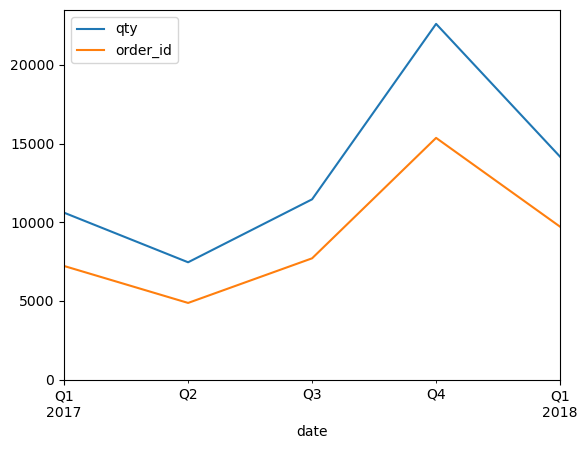

In [77]:
# Are there seasonal patterns in the evolution of sales?  
(orders_agg.resample("Q", on="date")
            .agg({"qty":"sum",
                  "order_id":"count"
            })
            .plot(ylim = (0))
)
plt.show()

In [78]:
# Top Products in Revenue
items.groupby("sku").agg({"unit_prices":"sum", "product_quantity":"sum", "unit_price":"mean"}).nlargest(15,"unit_prices").merge(products[["sku","name", "category", "type"]], "left", "sku")

,sku,unit_prices,product_quantity,unit_price,name,category,type
0,APP2075,212411.11,70,3034.958116,"Apple MacBook Pro 15 ""Core i7 Touch Bar 29Ghz ...",Computer/Laptop,"1,02E+12"
1,APP2074,153884.97,60,2564.749500,"Apple MacBook Pro 15 ""Core i7 Touch Bar 28GHz ...",Computer/Laptop,"1,02E+12"
2,LGE0044,139132.31,246,566.111787,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",Monitor,1296
3,APP2489,133004.55,117,1136.732895,Apple iPhone 64GB Space Gray X,Smartphone,113271716
4,APP2072,130197.91,132,986.327165,"Apple MacBook Air 13 ""Core i5 18GHz | 8GB RAM ...",Computer/Laptop,"2,17E+11"
5,PAC2136,126672.95,60,2110.644138,"Apple iMac 27 ""Core i5 Retina 5K 34GHz | 16GB ...",Accessory,"5,74E+15"
6,APP2073,121385.77,99,1226.564105,"Apple MacBook Air 13 ""Core i5 18GHz | 8GB RAM ...",Computer/Laptop,"2,17E+11"
7,APP2089,113149.65,58,1949.433636,"Apple iMac 27 ""Core i5 3.4Ghz 5K Retina | 8GB ...",Accessory,"5,74E+15"
8,APP1956,105459.33,57,1848.268000,"Apple MacBook Pro Retina 13 ""Core i7 3GHz | 8G...",Computer/Laptop,1282
9,APP2446,104941.86,271,387.263257,Apple iPhone 6 32GB Space Gray,Smartphone,21561716


Revenue - decrease in Q1 2018 

C:\Users\nix-n\AppData\Local\Temp\ipykernel_18128\678744220.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  g = sns.lineplot(data.loc[data.date > "31.12.2017"],   # change here overall vs timeslot


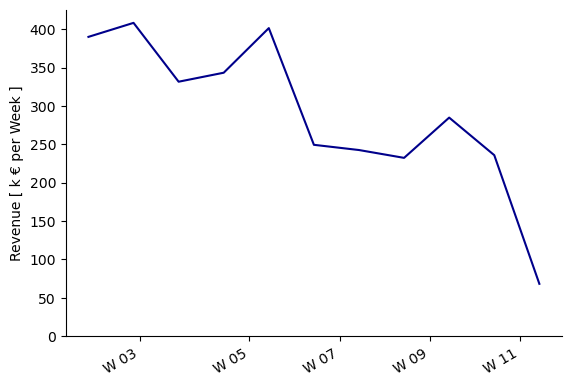

In [42]:
data = items.merge(products, "left", "sku").resample("W", on="date").agg({"unit_prices":"sum"}).reset_index()
g = sns.lineplot(data.loc[data.date > "31.12.2017"],   # change here overall vs timeslot
            x= "date",
            y=data.unit_prices/1000,
            color = "darkblue"
            )
g.set(ylabel = 'Revenue [ k € per Week ]', xlabel="")
g.set_ylim(0)
g.xaxis.set_major_formatter(mdates.DateFormatter('W %W'))  # Format the dates on the x-axis
g.spines[['top', 'right']].set_visible(False)
plt.gcf().autofmt_xdate()  # Optionally auto-format the date labels to avoid overlap 
plt.show()

Revenue overall

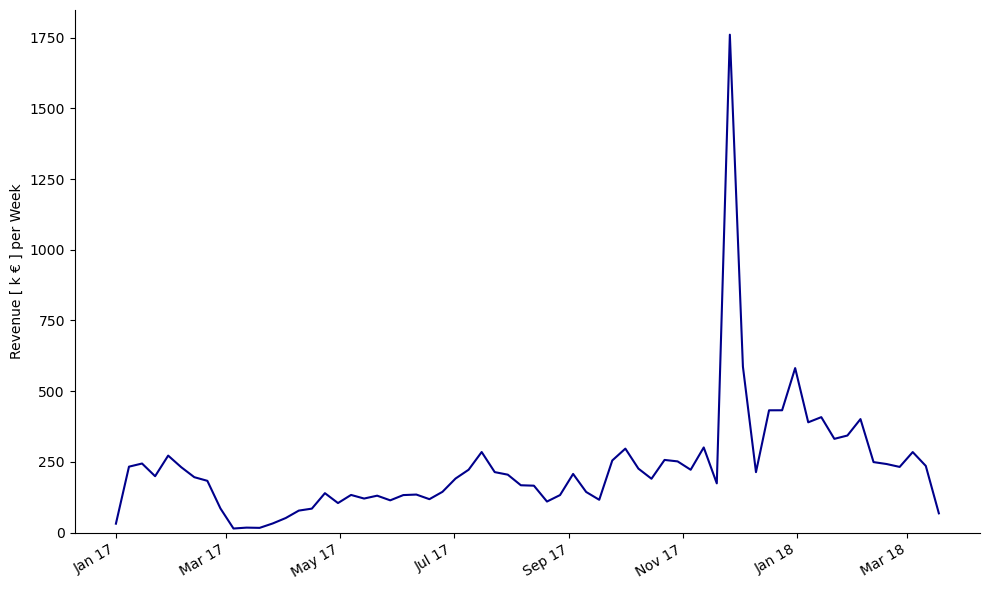

In [43]:
data = items.merge(products, "left", "sku").resample("W", on="date").agg({"unit_prices":"sum"}).reset_index()
fig, ax1 = plt.subplots(figsize=(10, 6))
g = sns.lineplot(data,   # change here overall vs timeslot
            x= "date",
            y=data.unit_prices/1000,
            color = "darkblue",
            ax=ax1
            )
g.set(ylabel = 'Revenue [ k € ] per Week', xlabel="")
g.set_ylim(0) 
g.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))  # Format the dates on the x-axis
g.spines[['top', 'right']].set_visible(False)
plt.gcf().autofmt_xdate()  # Optionally auto-format the date labels to avoid overlap
fig.tight_layout()  

plt.show()

In [44]:
# Revenue overall
items.resample("W", on="date")["unit_prices"].sum().mean()/1000

230.94630578125

Revenue and Discount overall

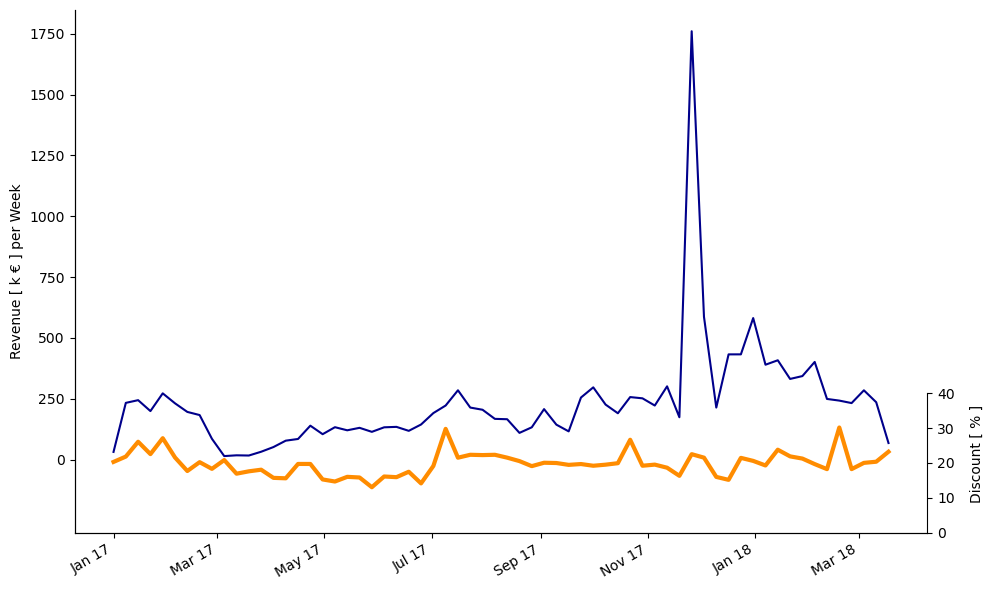

In [45]:
data = items.merge(products, "left", "sku").resample("W", on="date").agg({"unit_prices":"sum","unit_discount_perc":"mean"}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1 = sns.lineplot(data,   # change here overall vs timeslot
            x= "date",
            y=data.unit_prices/1000,
            color = "darkblue",
            ax=ax1
            )
ax1.set(ylabel = 'Revenue [ k € ] per Week', xlabel="")
ax1.set_ylim(-300) 
ax1.set_yticks(range(0, 1751, 250))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))  # Format the dates on the x-axis
sns.despine(ax=ax1)

ax2 = ax1.twinx() 
sns.lineplot(data,   # change here overall vs timeslot
            x= "date",
            y="unit_discount_perc",
            color = "darkorange",
            ax=ax2,
            linewidth=3
            )
ax2.set_ylim(5,150) 
ax2.set_yticks(range(0, 41, 10))
ax2.spines['right'].set_bounds(0, 40)
ax2.spines['top'].set_bounds(0,0)
ax2.set(ylabel = 'Discount [ % ]', xlabel="")
ax2.yaxis.set_label_coords(1.05, 0.15)

plt.gcf().autofmt_xdate()  # Optionally auto-format the date labels to avoid overlap
fig.tight_layout()  
plt.show()

### Brands & Products

In [80]:
# most sold brands
top_brands = (
    items.merge(brands, "left", left_on=items.sku.str[:3], right_on="short")
    .groupby("long")
    .agg({"product_quantity": "sum"})
)
top_brands["percent"] = (top_brands["product_quantity"] / top_brands["product_quantity"].sum() * 100).round(1)
top_brands = top_brands.nlargest(10, "product_quantity")
top_brands

,product_quantity,percent
long,,
Apple,14403,21.7
OWC,4008,6.1
Western Digital,2512,3.8
Pack,2413,3.6
Belkin,2396,3.6
LaCie,2234,3.4
Crucial,2123,3.2
Satechi,2049,3.1
Wacom,1967,3.0


In [81]:
# Top Products in Sales
items.groupby("sku").agg({"unit_prices":"sum", "product_quantity":"sum", "unit_price":"mean", "unit_discount":"mean"}).nlargest(15,"product_quantity").merge(products[["sku","name","category"]], "left", "sku")

,sku,unit_prices,product_quantity,unit_price,unit_discount,name,category
0,APP1190,53840.00,989,54.471676,15.528324,IPhone AppleCare Protection Plan,Service/Repair
1,APP0698,8289.11,832,9.975258,15.024742,Apple Lightning Cable Connector to USB 1m Whit...,Electronic Accessory
2,APP1922,90925.24,567,160.374519,18.625481,AirPods Apple Bluetooth Headset for iPhone iPa...,Multimedia
3,WDT0183,68893.71,501,137.526224,31.473776,"Red 4TB WD 35 ""Mac PC hard drive and NAS",Network/Memory
4,APP0927,8405.94,492,17.161496,17.838504,EarPods Apple Headphones with Remote and Mic (...,Multimedia
5,CRU0051,45547.42,338,135.289094,23.370906,Crucial MX300 525GB SSD Disk,Network/Memory
6,SAM0074,51366.30,338,152.036111,27.953889,Samsung 850 EVO SSD Disk 500GB,Network/Memory
7,APP1214,22716.68,280,81.123793,7.876207,Apple Magic Mouse 2,Electronic Accessory
8,NTE0013,5056.19,279,19.352857,7.637143,"AdaptaDrive NewerTech adapter 2.5 ""to 3.5"" SATA",Network/Memory
9,APP2446,104941.86,271,387.263257,62.066743,Apple iPhone 6 32GB Space Gray,Smartphone


How many Products are discounted?

In [46]:
items["discount_cat"] = 0
items.loc[items.unit_discount_perc > 0,"discount_cat"] = 1
items['discount_cat'] = items['discount_cat'].astype('category')

items["discount_cat"].value_counts(normalize=True)

1    0.93092
0    0.06908
Name: discount_cat, dtype: float64

Price vs Unit_price; show that most products are discounted

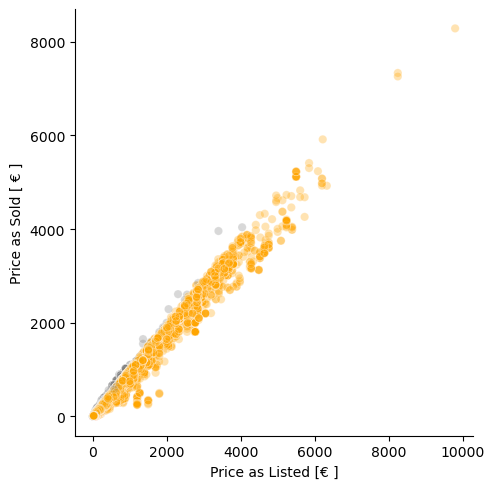

In [47]:
df = items.merge(products, "left", "sku")
sns.relplot(data=df,
            kind = "scatter",
            x="price",
            y="unit_price",
            alpha= 0.3,
            hue= "discount_cat",
            palette = {0: 'grey', 1: 'orange'}
            )\
    .set_axis_labels("Price as Listed [€ ]", "Price as Sold [ € ]")\
    .legend.remove()
plt.show()

spread the data points using other aestetics

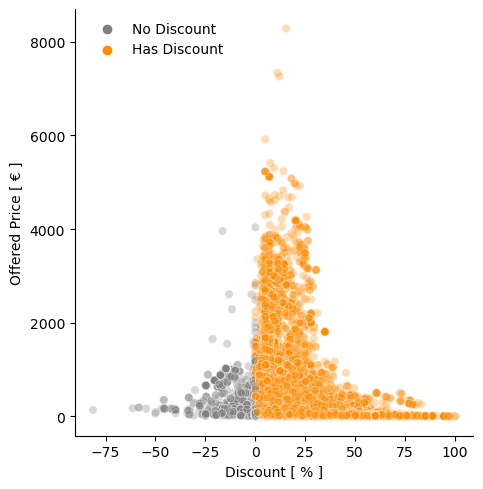

In [48]:
df = items.merge(products, "left", "sku")
g = sns.relplot(data=df,
            kind = "scatter",
            y="unit_price",
            x="unit_discount_perc",
            alpha= 0.3,
            hue= "discount_cat",
            palette = {0: 'grey', 1: 'darkorange'}
            )
g.set_axis_labels("Discount [ % ]", "Offered Price [ € ]")
g.despine()
legend_labels = ['No Discount', 'Has Discount'] # Define custom legend labels
g._legend.remove() # Remove the original legend
handles, labels = g.ax.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
g.fig.legend(handles=handles, labels=new_labels, title="", bbox_to_anchor=(0.17, 0.85), loc='lower left', ncol=1, frameon= False)
fig.tight_layout()

plt.show()

Revenue [€], Sales [n] and Discount [%] over time

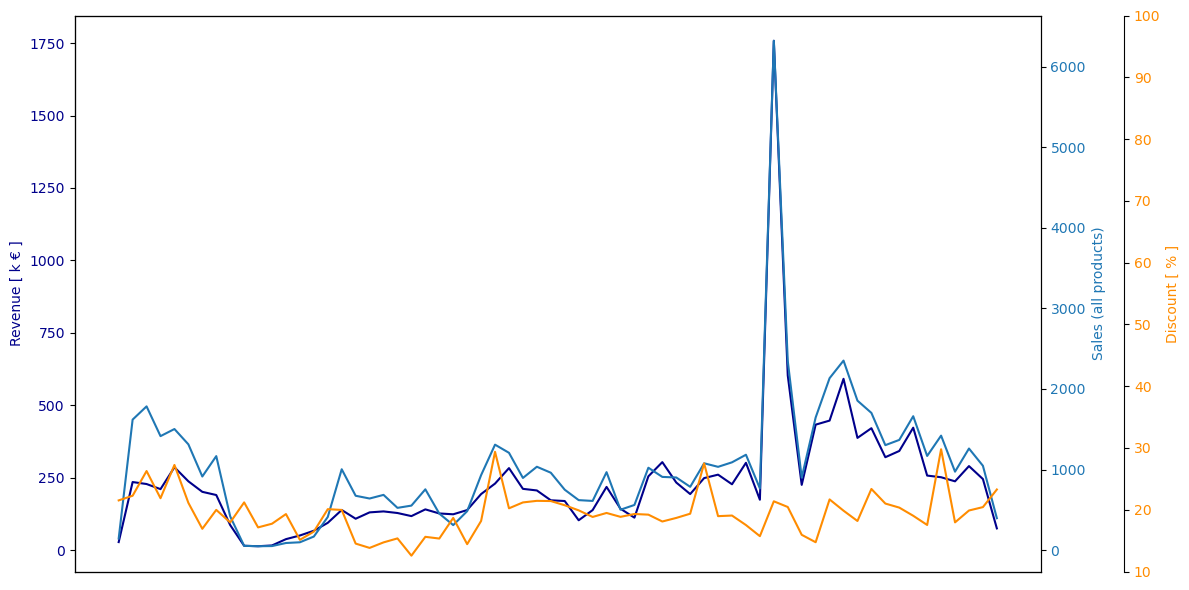

In [54]:
orders_agg_resampled =  (orders_agg.resample("W", on="date")
            .agg({"order_id":["count"],
                  "total_paid":["mean","sum"],
                  "sum_prices_as_shopped":["mean","sum"],
                  "sum_prices_as_listed":["mean","sum"],
                  "discount":["mean","sum"],
                  "discount_perc":["mean","sum"],
                  "discount_est":["mean","sum"],
                  "discount_est_perc":["mean","sum"],
                  "sum_dicount_prices_as_listed":["mean","sum"],
                  "freight":["mean","sum"],
                  "qty":["mean","sum"]}))


fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'darkblue'
ax1.set_xlabel('')
ax1.set_ylabel('Revenue [ k € ]', color=color)
ax1.plot(orders_agg_resampled.index, orders_agg_resampled[("total_paid", "sum")]/1000, color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.despine()

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Sales (all products)', color=color)  
ax2.plot(orders_agg_resampled.index, orders_agg_resampled[("qty", "sum")], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()  
color = 'darkorange'
ax3.set_ylabel('Discount [ % ]', color=color)  
ax3.set_ylim(10,100) 
ax3.plot(orders_agg_resampled.index, orders_agg_resampled[("discount_perc", "mean")], color=color)
ax3.tick_params(axis='y', labelcolor=color)
#ax3.despine()

ax3.spines['right'].set_position(('outward', 60))
ax1.xaxis.set_ticks([])

fig.tight_layout()  
plt.show()

Correlation of Discount and Revenue

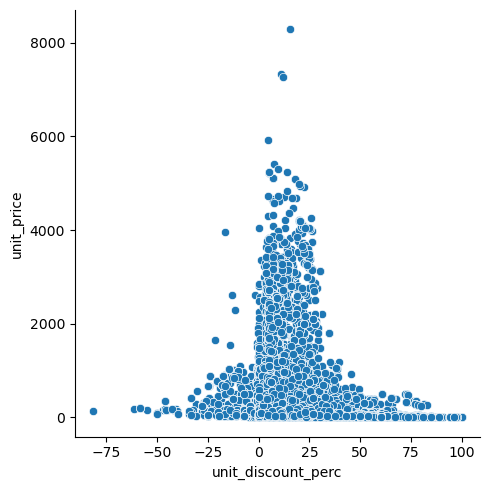

,unit_price,unit_discount_perc
unit_price,1.0***,-0.24***
unit_discount_perc,-0.24***,1.0***


In [55]:
sns.relplot(items.merge(products, "left", "sku"),
            x="unit_discount_perc",
            y="unit_price"
            )
plt.show()

df = items.merge(products, "left", "sku")[["unit_price", "unit_discount_perc"]]

rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho.round(2).astype(str) + p

### Categories

Top 5 Revenue categories

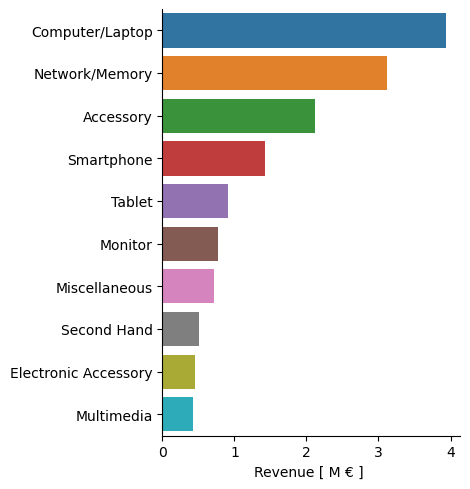

In [56]:
data = items.merge(products,"left","sku").groupby("category").agg({"unit_prices":"sum"}).reset_index().sort_values("unit_prices", ascending=False).head(10)
sns.catplot(data = data,
            kind= "bar",
            y="category",
            x=data.unit_prices/1000000
            )\
      .tight_layout()\
      .set_xlabels('Revenue [ M € ] ')\
      .set_ylabels("")
      #.tick_params(axis='x', rotation=90)\
plt.show()

Top 3 Revenue Categories over time: mean price + fixed price + CI

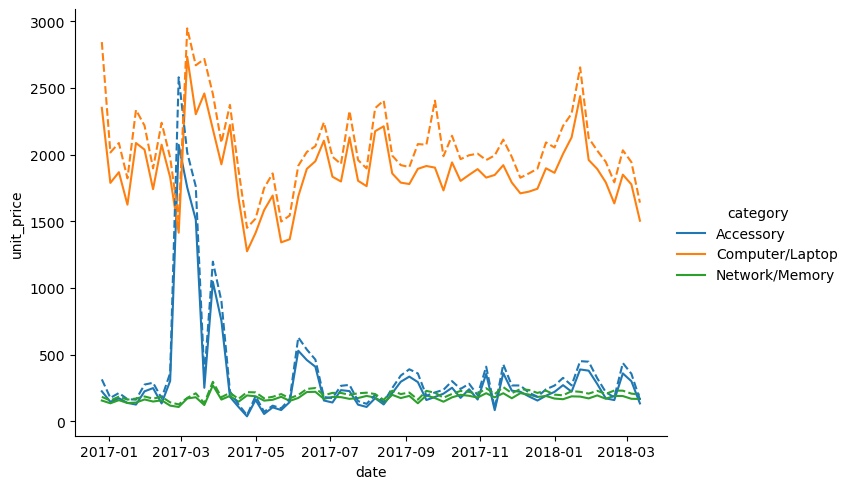

In [57]:
items_merge = items.merge(products,"left","sku")  # .resample("D", on="date")
data = items_merge.loc[items_merge.category.isin(["Computer/Laptop", "Network/Memory", "Accessory"])]\
            .groupby([items_merge.date.dt.to_period("W").astype('datetime64[ns]'),
                      "category" 
                        ])\
            .mean(numeric_only=True)\
            .reset_index()

sns.relplot(data=data,
            kind="line",
            x="date",
            y="unit_price",
            hue="category",
            aspect=1.4) 

sns.lineplot(data=data,
                 x="date",
                 y="price",
                 hue="category",
                 #dashes=True, 
                 #dashes=[(2,2)]*data.category.drop_duplicates().count(), 
                 linestyle= "--",
                 legend=False)  

plt.show()

Top 3 Revenue Categories: Revenue [€], Sales [n] and Discount [%] over time

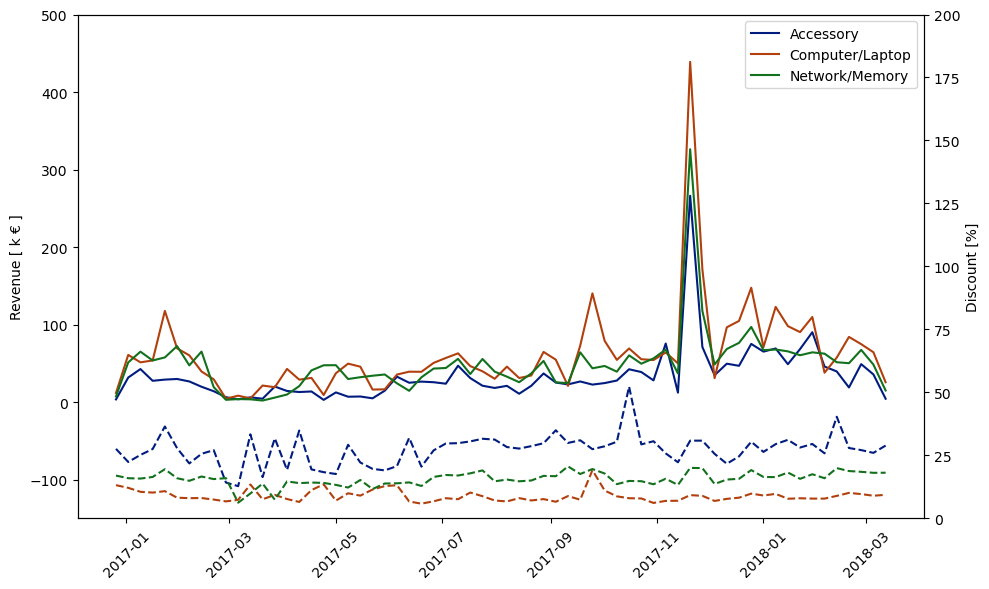

In [59]:
items_merge = items.merge(products,"left","sku")  # .resample("D", on="date")
data = items_merge.loc[items_merge.category.isin(["Computer/Laptop", "Network/Memory", "Accessory"])]\
            .groupby([items_merge.date.dt.to_period("W").astype('datetime64[ns]'),
                      "category" 
                        ])\
            .agg({"price":"mean",
                  "unit_prices":"sum",
                  "unit_discount_perc":"mean"})\
            .reset_index()

fig, ax1 = plt.subplots(figsize=(10,6))
color = "dark"
ax1 = sns.lineplot(data=data,
            x="date",
            y=data.unit_prices/1000,
            hue="category",
            palette=color,
            ax=ax1)

ax1.legend_.set_title(None)        
ax1.set_xlabel('')
ax1.set_ylabel('Revenue [ k € ]')
ax1.tick_params(axis='y')
ax1.set_ylim(-150,500) 
ax1.tick_params(axis='x', rotation=45)

ax2 = plt.twinx()
sns.lineplot(data=data,
                 ax=ax2,
                 x="date",
                 y="unit_discount_perc",
                 hue="category",
                 palette=color,
                 #dashes=True, 
                 #dashes=[(2,2)]*data.category.drop_duplicates().count(), 
                 linestyle= "--",
                 legend=False)\
      .set_ylabel('Discount [%]')   
ax2.set_ylim(0,200) 
#ax2.legend_.set_title(None)    

fig.tight_layout()  

plt.show()

Selected Category: Revenue and Discount over time

C:\Users\nix-n\AppData\Local\Temp\ipykernel_18128\4043094865.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.mean()


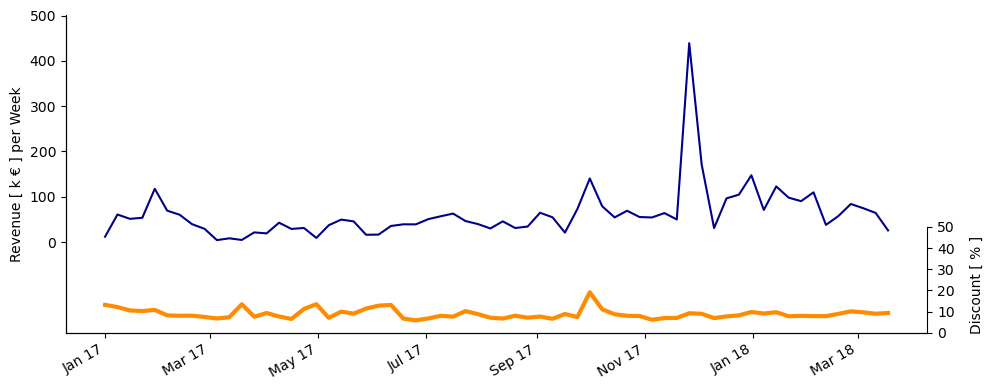

In [60]:
cat = ["Computer/Laptop", "Accessory"][0]   # change here for another category
items_merge = items.merge(products, "left", "sku")
data = items_merge.loc[items_merge.category == cat].resample("W", on="date").agg({"unit_prices":"sum","unit_discount_perc":"mean"}).reset_index()

data.mean()

fig, ax1 = plt.subplots(figsize=(10, 4))
ax1 = sns.lineplot(data,   # change here overall vs timeslot
            x= "date",
            y=data.unit_prices/1000,
            color = "darkblue",
            ax=ax1
            )
ax1.set(ylabel = 'Revenue [ k € ] per Week', xlabel="")
ax1.set_ylim(-200) 
ax1.set_yticks(range(0, 501, 100))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))  # Format the dates on the x-axis
sns.despine(ax=ax1)

ax2 = ax1.twinx() 
sns.lineplot(data,   # change here overall vs timeslot
            x= "date",
            y="unit_discount_perc",
            color = "darkorange",
            ax=ax2,
            linewidth=3
            )
ax2.set_ylim(5,150) 
ax2.set_yticks(range(0, 51, 10))
ax2.spines['right'].set_bounds(0, 50)
ax2.spines['top'].set_bounds(0,0)
ax2.set(ylabel = 'Discount [ % ]', xlabel="")
ax2.yaxis.set_label_coords(1.05, 0.15)

plt.gcf().autofmt_xdate()  # Optionally auto-format the date labels to avoid overlap
fig.tight_layout()  

plt.show()


Correletion of discount and revenue per category

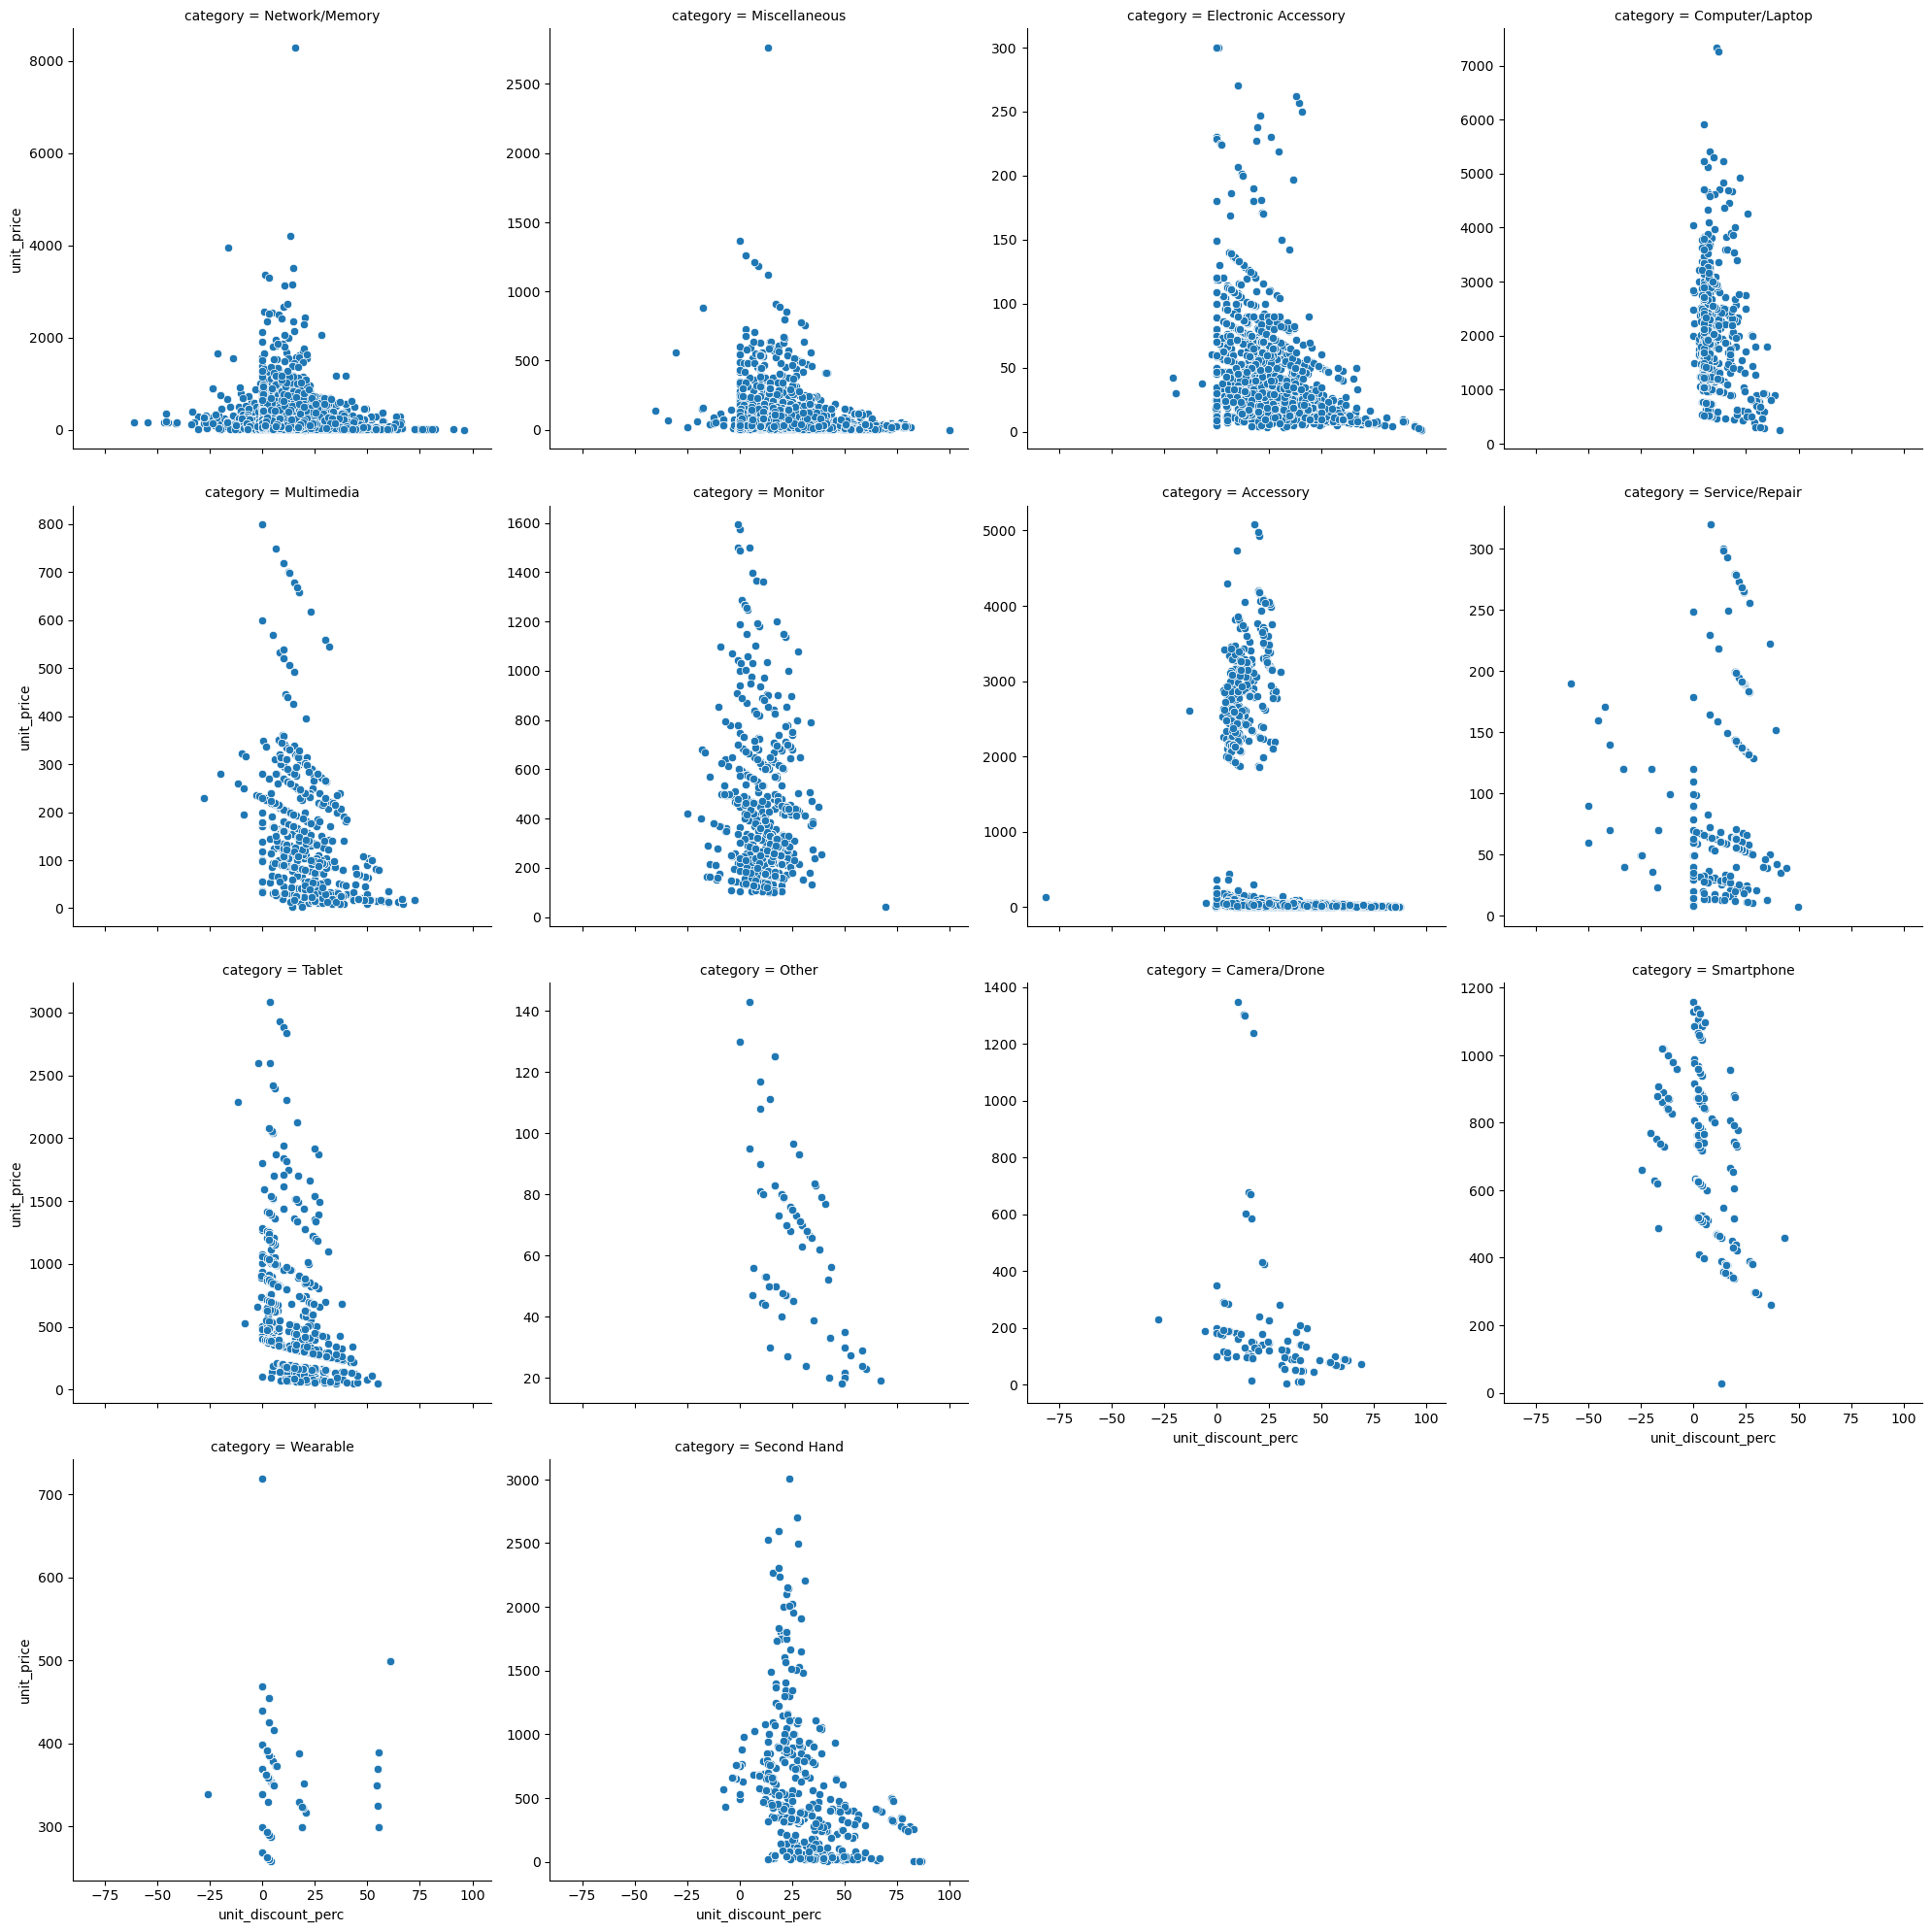

C:\Users\nix-n\AppData\Local\Temp\ipykernel_18128\3750727606.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rho = df.corr()
C:\Users\nix-n\AppData\Local\Temp\ipykernel_18128\3750727606.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)


,unit_price,unit_discount_perc
unit_price,1.0***,-0.24***
unit_discount_perc,-0.24***,1.0***


In [61]:
sns.relplot(items.merge(products, "left", "sku"),
            x="unit_discount_perc",
            y="unit_price",
            col="category",
            col_wrap=4,
            facet_kws=dict(sharey=False)
            )
plt.show()

df = items.merge(products, "left", "sku")[["unit_price", "unit_discount_perc","category"]]

df.groupby("category")[["unit_price", "unit_discount_perc"]].corr()

rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho.round(2).astype(str) + p


not a strong correlation.. not a strong point!


### Individual Procucts

prices of top revenue products over time, compared to listed price

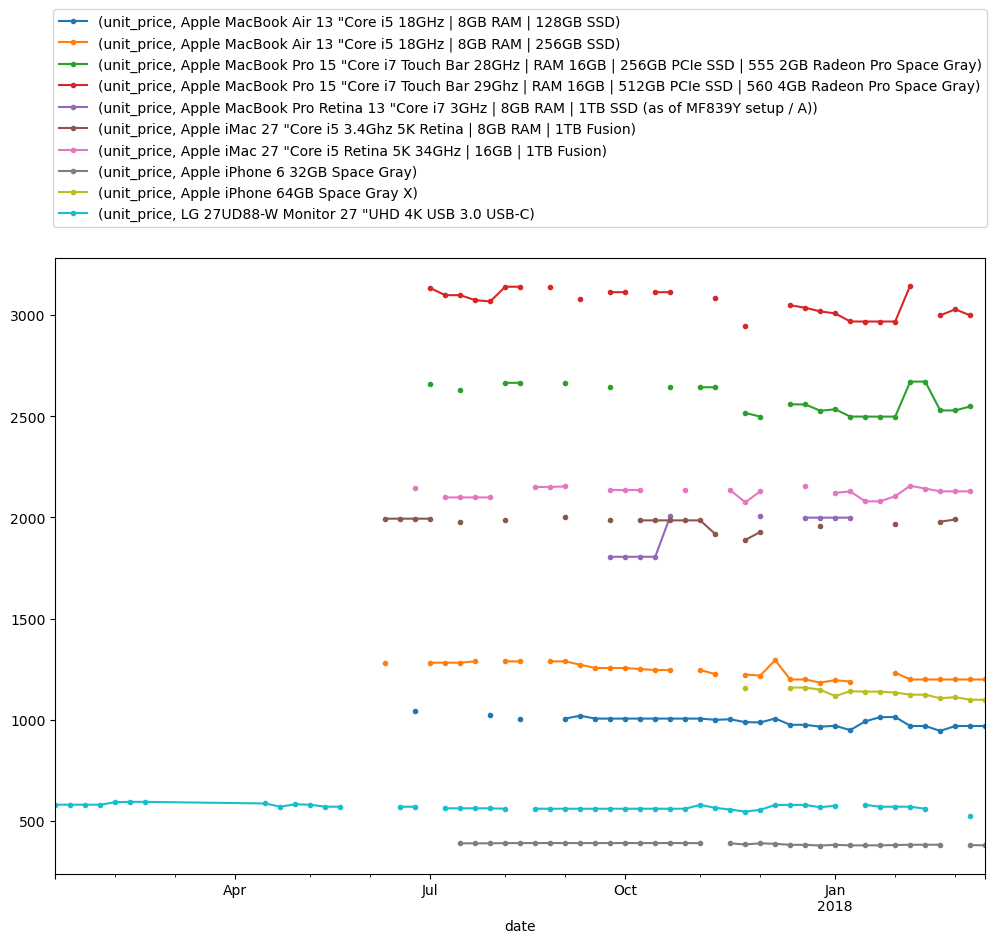

In [62]:
top_revenue_sku = items.groupby("sku").agg({"unit_prices":"sum", "product_quantity":"sum", "unit_price":"mean"}).nlargest(10,"unit_prices").merge(products[["sku","name"]], "left", "sku")

y=items.merge(products.loc[products.sku.isin(top_revenue_sku["sku"])], "inner", "sku")

fig, ax = plt.subplots()
(y.groupby([y.date.dt.to_period("w"), y.name])
  .agg({"unit_price":"mean"})
  .unstack()
  .plot(ax=ax,
        kind="line", 
        figsize=(12,8), 
        marker='o',
        ms=3
        ))
#ax.legend(top_revenue_sku.name) 
ax.legend(bbox_to_anchor=(0.5, 1.05), loc='lower center', borderaxespad=0.)
plt.savefig('x.png', bbox_inches='tight')
plt.show()


prices of top sold products over time, compared to listed price

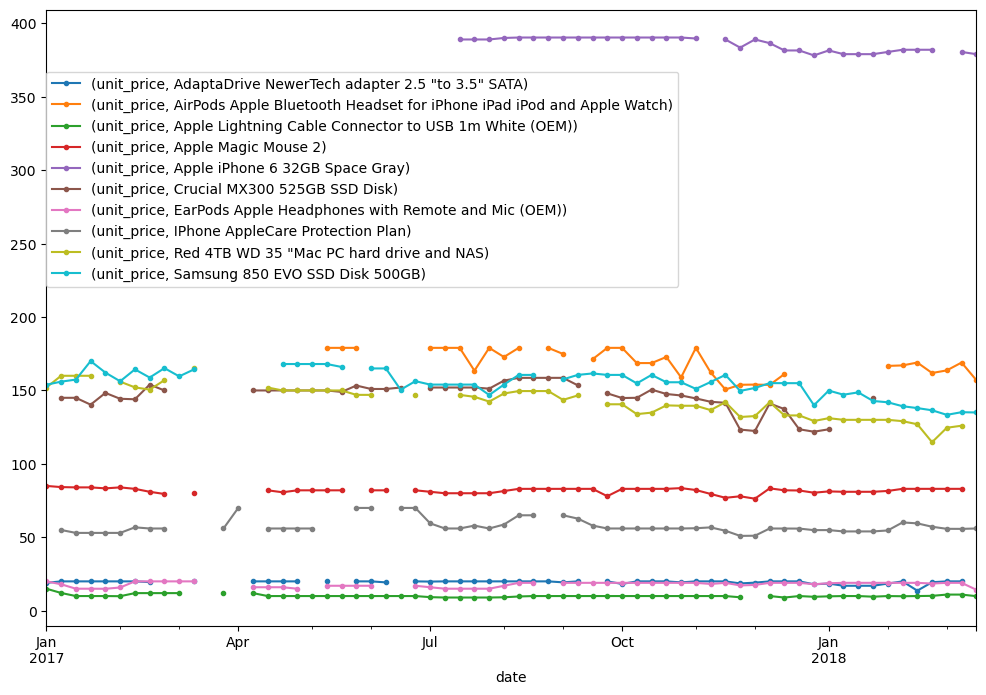

In [63]:
top_revenue_sku = items.groupby("sku").agg({"unit_prices":"sum", "product_quantity":"sum", "unit_price":"mean"}).nlargest(10,"product_quantity").merge(products[["sku","name"]], "left", "sku")

y=items.merge(products.loc[products.sku.isin(top_revenue_sku["sku"])], "inner", "sku")

fig, ax = plt.subplots()
(y.groupby([y.date.dt.to_period("w"), y.name])
  .agg({"unit_price":"mean"})
  .unstack()
  .plot(ax=ax,
        kind="line", 
        figsize=(12,8), 
        marker='o',
        ms=3
        ))
#ax.legend(top_revenue_sku.name) 
ax.legend(bbox_to_anchor=(0.0, 0.55), loc='lower left', borderaxespad=0.)
plt.savefig('x.png', bbox_inches='tight')
plt.show()

there are datapoints missing between March and April 2017